In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from matplotlib import cm
from PIL import Image

In [2]:
DATA_ROOT = "../data/out/tmp"

In [3]:
def preprocess_image(img: npt.NDArray[np.float32]) -> npt.NDArray[np.uint8]:
    """
    Preprocesses an image by converting it to a 3-channel uint8 array.

    Parameters
    ----------
    img : numpy.typing.NDArray[np.float32]
        The input image array.

    Returns
    -------
    numpy.typing.NDArray[np.uint8]
        The preprocessed image array.
    """

    num_channels = img.shape[0]

    if num_channels == 1:
        img_2d = (np.squeeze(img, axis=0) * 255).astype(np.uint8)
        img = np.stack([img_2d] * 3, axis=0)
    return (np.transpose(img, axes=(1, 2, 0)) * 255).astype(np.uint8)

In [4]:
def plot_image(
    img: npt.NDArray[np.float32],
    ax: plt.Axes | None = None,
    force_gray_scale: bool = False,
    **kwargs
) -> None:
    """
    Plot an image on the given axes.

    Parameters
    ----------
    img : numpy.ndarray
        The image to be plotted.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot the image. If not provided, the current axes will be used.

    Returns
    -------
    None
    """
    ax = ax or plt.gca()
    ax.imshow(
        Image.fromarray(preprocess_image(img)).convert(
            "L" if force_gray_scale else None
        ),
        **kwargs
    )
    ax.axis("off")

In [5]:
def show_predictions_during_training(
    data_root,
    img_num: int,
    batch_num: int,
    epochs: list[int] | None,
    force_gray_scale: bool = False,
    img_kwargs: dict = {},
):
    """
    Display the original and predicted images during training for different epochs.

    Parameters
    ----------
    data_root : str
        The root directory of the data with predictions.
    img_num : int
        The index of the image to display.
    batch_num : int
        The index of the batch to display.
    epochs : list[int] | None, optional
        The list of epochs to display. If None, all available epochs will be displayed.

    Returns
    -------
    None
    """

    if epochs is None:
        epochs = [
            int(file_nm.split("_")[-1].removesuffix(".npz"))
            for file_nm in os.listdir(data_root)
        ]
    epochs.sort()

    fig, axes = plt.subplots(1, 1 + len(epochs), figsize=(10, 5))

    for i, (ax, epoch_num) in enumerate(zip(axes[1:], epochs)):
        x = np.load(os.path.join(data_root, f"slots_{epoch_num}.npz"))
        if i == 0:
            axes[0].set_title("Original Image\n")
            plot_image(
                x["original_img"][batch_num][img_num],
                axes[0],
                force_gray_scale=force_gray_scale,
                **img_kwargs,
            )

        ax.set_title(f"Predicted Image\nepoch = {epoch_num}")
        plot_image(
            x["pred_img"][batch_num][img_num],
            ax,
            force_gray_scale=force_gray_scale,
            **img_kwargs,
        )

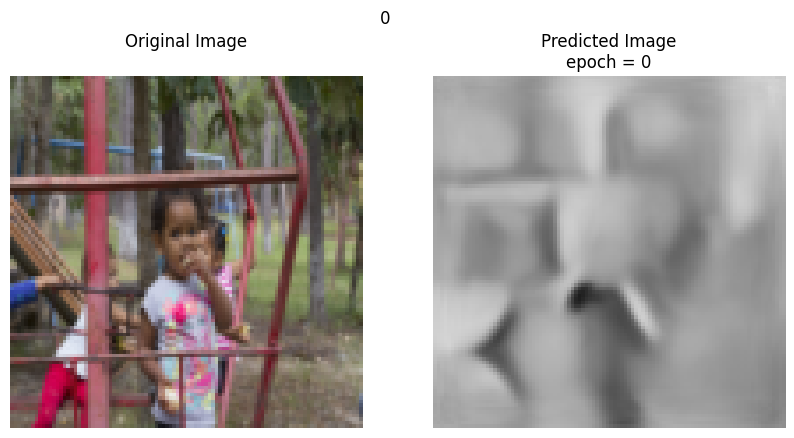

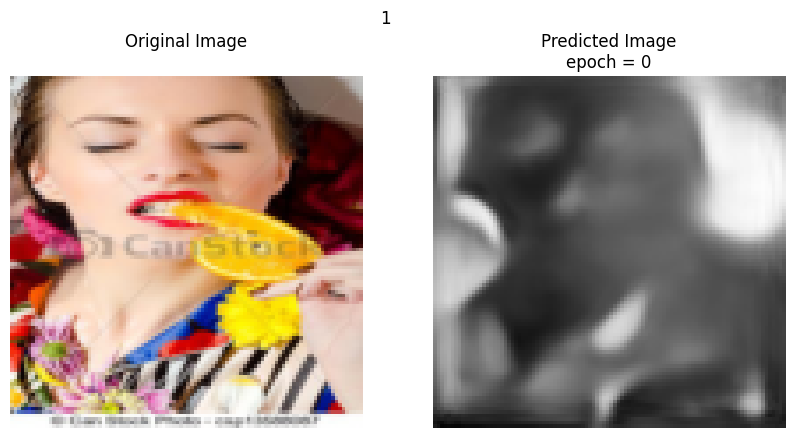

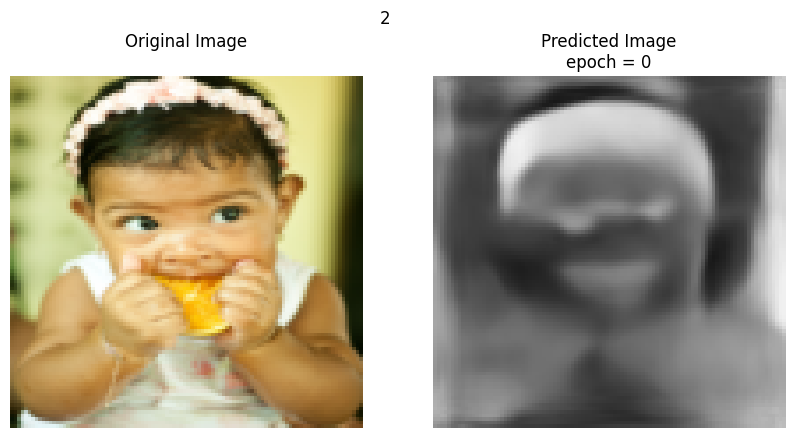

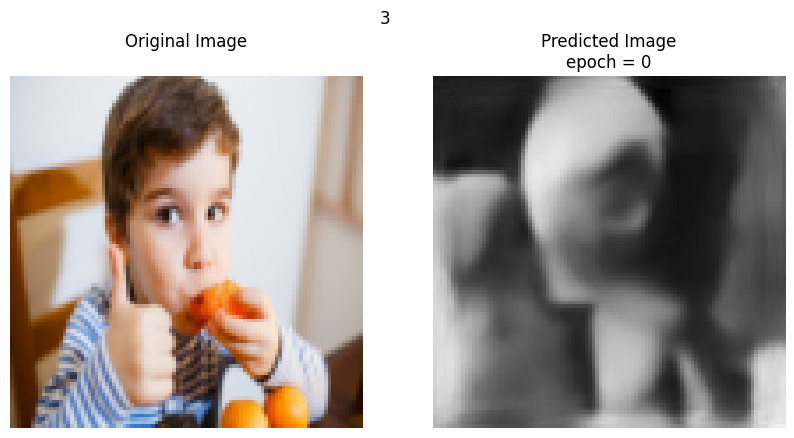

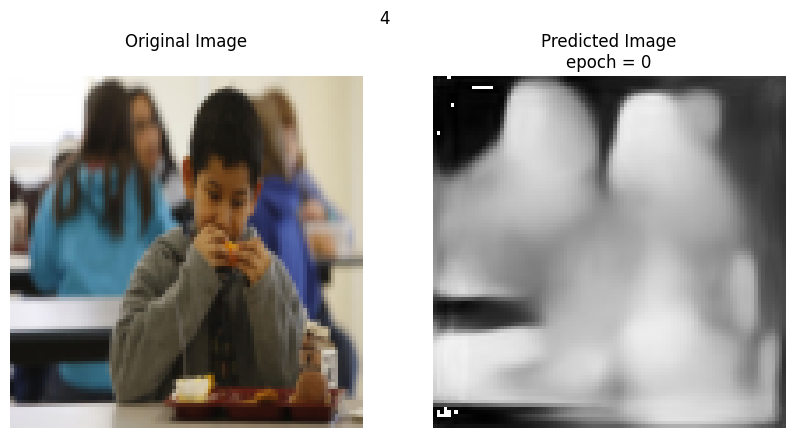

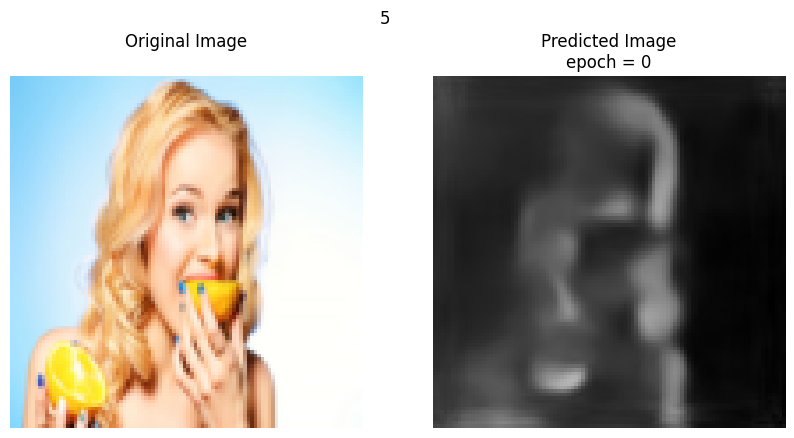

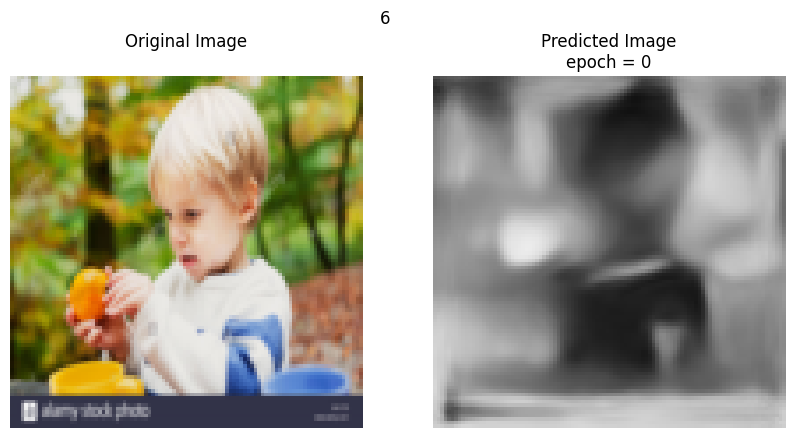

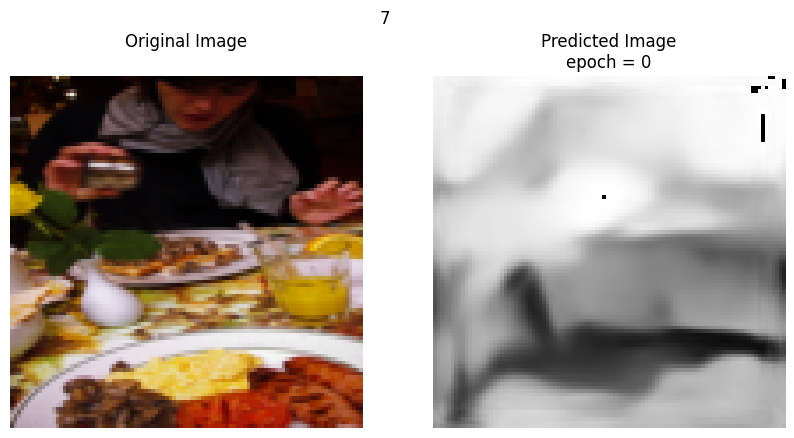

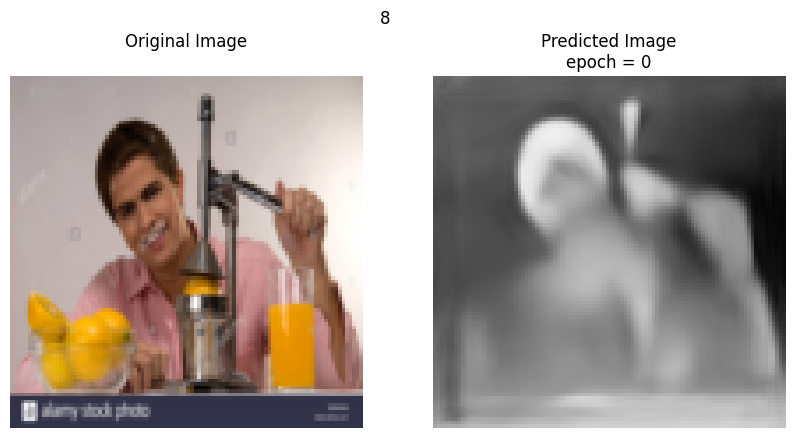

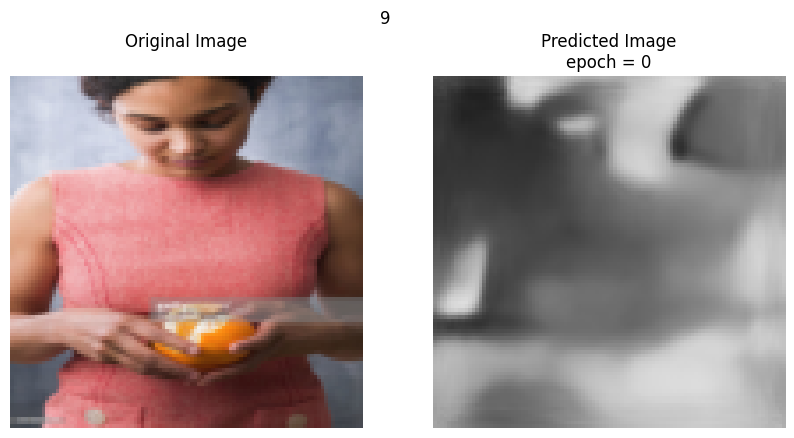

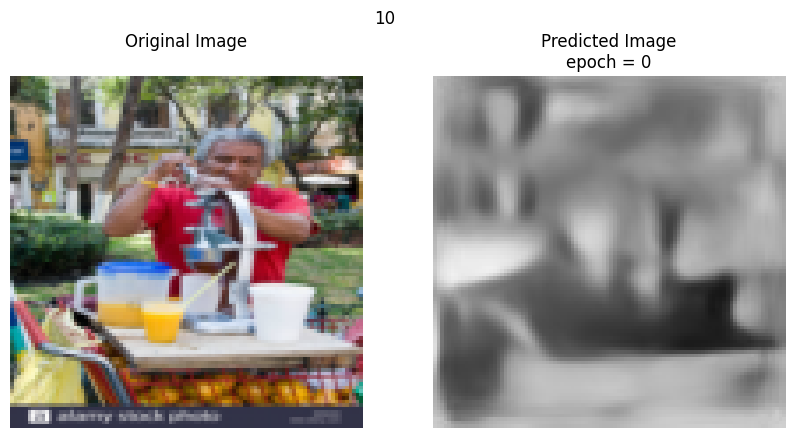

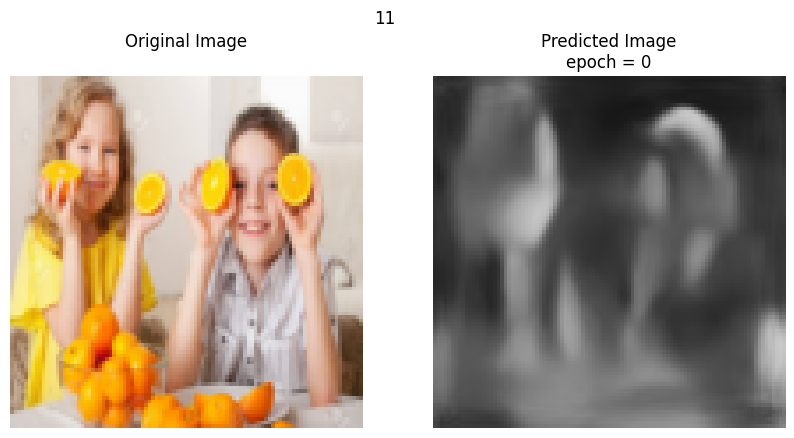

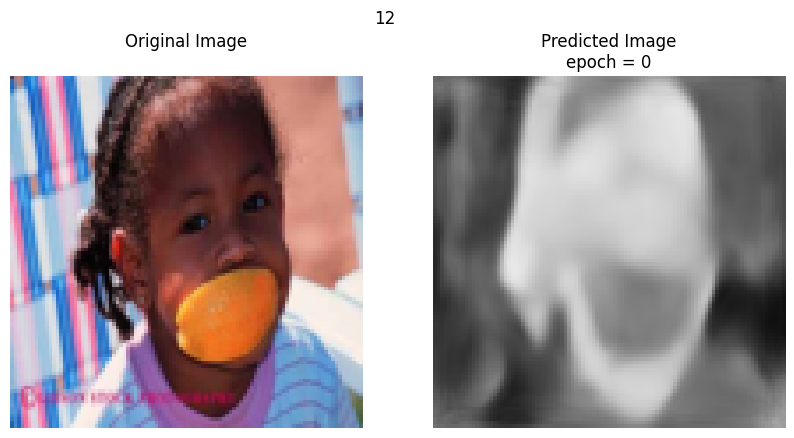

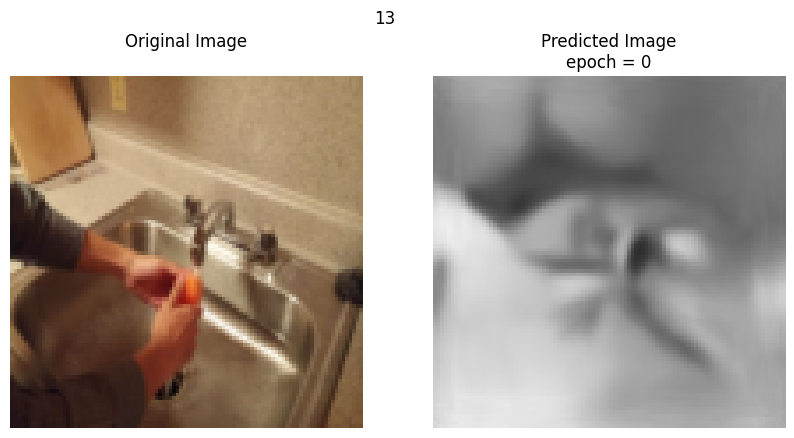

In [6]:
for img_num in range(14):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        batch_num=1,
        epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    plt.suptitle(img_num)
    plt.show()

In [7]:
def plot_slot(
    npz_file,
    batch_num,
    img_num,
    slot_id: int,
    ax: plt.Axes | None = None,
    force_gray_scale: bool = False,
    **kwargs,
):
    recons = npz_file["recons"][batch_num][img_num]
    ax = ax or plt.gca()
    ax.set_title(f"Slot {slot_id}")
    plot_image(np.transpose(recons[slot_id], (2, 0, 1)), ax, force_gray_scale, **kwargs)


def plot_slots(
    data_root,
    epoch,
    batch_num,
    img_num,
    slot_ids: list[int] | None = None,
    fig_shape: tuple[int, int] | None = None,
    force_gray_scale: bool = False,
    fig_kwargs: dict = {},
) -> None:
    x = np.load(os.path.join(data_root, f"slots_{epoch}.npz"))
    recons = x["recons"][batch_num][img_num]

    if slot_ids is None:
        slot_ids = list(range(recons.shape[0]))
        slot_ids.sort()

    if fig_shape is None:
        fig_shape = (1, len(slot_ids) + 1)
    fig, axes = plt.subplots(*fig_shape, figsize=(10, 5))

    # TODO: make it work when len(slot_ids) != fig_shape[0] * fig_shape[1] - 1
    for i, (slot, ax) in enumerate(zip(slot_ids, axes.flat[1:])):
        if i == 0:
            axes.flat[0].set_title("Reconstructed image")
            plot_image(
                x["pred_img"][batch_num][img_num],
                axes.flat[0],
                force_gray_scale=force_gray_scale,
                **fig_kwargs,
            )
        ax.set_title(f"Slot {slot}")
        plot_slot(
            x,
            batch_num,
            img_num,
            slot,
            ax,
            force_gray_scale=force_gray_scale,
            **fig_kwargs,
        )

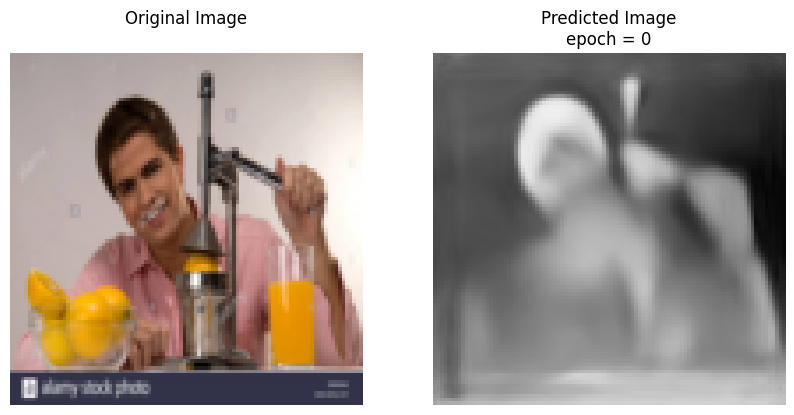

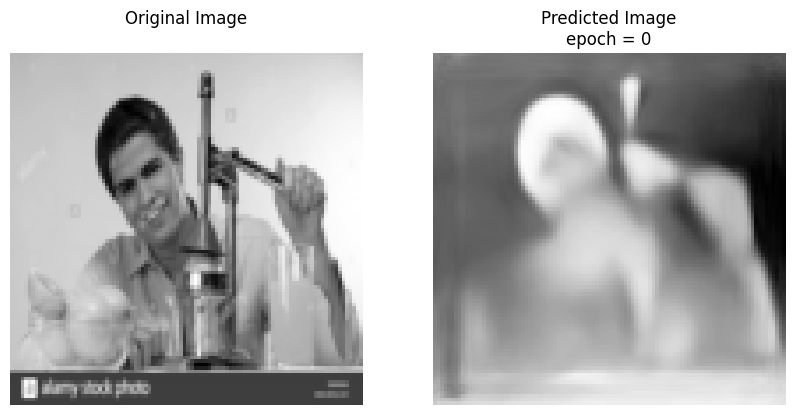

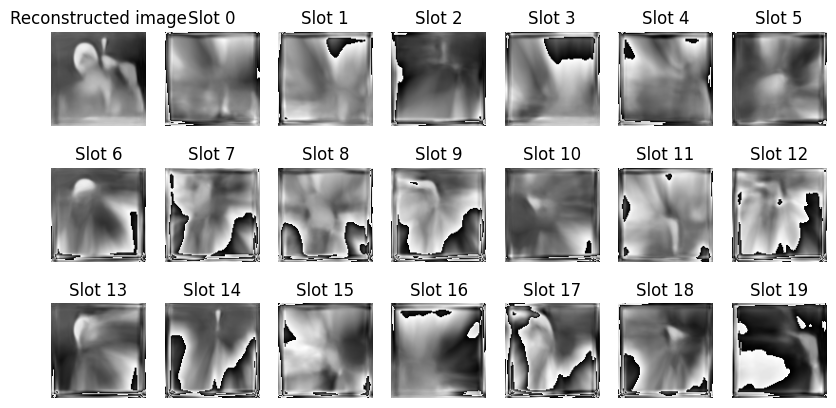

In [8]:
show_predictions_during_training(
    DATA_ROOT,
    img_num=8,
    batch_num=1,
    epochs=None,
)
show_predictions_during_training(
    DATA_ROOT,
    img_num=8,
    batch_num=1,
    epochs=None,
    force_gray_scale=True,
    img_kwargs={"cmap": cm.Greys_r},
)

plot_slots(DATA_ROOT, epoch=0, img_num=8, batch_num=1, fig_shape=(3, 7))
# slot_ids=[0, 1, 2, 3]